## Computer Vision using PyTorch

### Libraries
* **torchvision** : base domain library with pre trained models for computer vision (consists of popular datasets, model architectures, and common image transformations for computer vision)
* Another different libraries are:
  * **torchvision.dataset**,
  * **torchvision.models**,
  * **torchvision.transforms**,
  * **torch.utils.data.Dataset**,
  * **torch.utils.data.DataLoader**

In [1]:
## Importing torch and torchvision
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

## Importing matplotlib for visualizing and plotting
import matplotlib.pyplot as plt

In [2]:
print(torch.__version__)
print(torchvision.__version__)

2.9.0+cpu
0.24.0+cpu


### Aim is to build a computer vision model to find patterns in training data, and use the model to predict on test data
### 1. Loading a Dataset
* Importing a FashionMNIST dataset from torchvision.datasets
* The datasets found in torchvision.datasets are splitted to training and test sets

In [3]:
## Train Data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:03<00:00, 8.04MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 75.9kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.80MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.9MB/s]


In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

### 1.2 Visulazing the data

Image Shape: torch.Size([1, 28, 28])


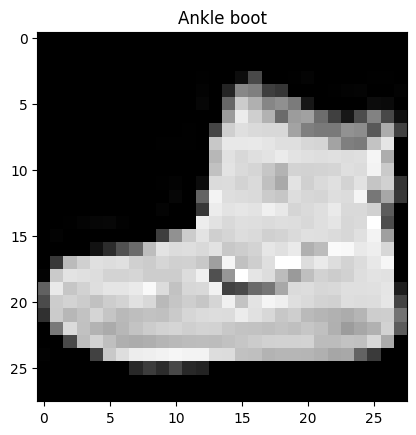

In [7]:
image, label = train_data[0]
print(f"Image Shape: {image.shape}")

plt.imshow(image.squeeze(), cmap="grey")
plt.title(class_names[label]);

In [8]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

### 2. Preparing DataLoader
* DataLoader turns the data into a Python iterbale.
* Turning the data into mini batches, which can be computationally efficient
* So breaking down to batch size of 44 common batch size is 32) ie 44 images/samples at a time
* By doing this, it gives the NN more chances to update its gradients per epoch

In [10]:
from torch.utils.data import DataLoader

# Setting up an hyperparameter of batch size
BATCH_SIZE = 44

# Turning dataset to iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size = BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c9052591eb0>,
 <torch.utils.data.dataloader.DataLoader at 0x7c9052558b00>)

In [11]:
# Checking out whats going on
print(f"DataLoaders: {train_dataloader, test_dataloader}")

print(f"Length of the train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c9052591eb0>, <torch.utils.data.dataloader.DataLoader object at 0x7c9052558b00>)
Length of the train dataloader: 1364 batches of 44
Length of test dataloader: 228 batches of 44


In [12]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([44, 1, 28, 28]), torch.Size([44]))

### 3. Building a baseline model
*  A baseline model is a simple model that gives a meaningfull performance refernce, and can be improved upon experiments
* Used a Flatten layer, which converts a multi-dim tensor to a 1D vector so that can be fed into a linear layer (which cant handle multi dimensional data)

In [13]:
# Started by creating a flatten layer
flatten_model = nn.Flatten()

x = train_features_batch[0]

# Flattening the sample
output = flatten_model(x)

print(f"Shape before Flattening: {x.shape}")
print(f"Shape after Flattening: {output.shape}")

Shape before Flattening: torch.Size([1, 28, 28])
Shape after Flattening: torch.Size([1, 784])


In [14]:
from torch import nn
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [18]:
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(
    input_shape=784,
    hidden_units= 10,
    output_shape= len(class_names)
)
model_1.to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### Setting up a Loss Function & Optimizer
* Loss Function: nn.CrossEntrophyLoss() for multi-class
* Optimizer: torch.optim.SGD()

In [20]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

## Evaluation Metric ie accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc
accuracy_fn

<function __main__.accuracy_fn(y_true, y_pred)>

In [21]:
loss_fn

CrossEntropyLoss()

In [22]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Creating a training loop
1. Loop through epochs
2. Loop through batches, perform training steps, calculate the train loss per batch
3. Loop through testing batch, perform testing steps, calculate the test loss per batch

In [23]:
import time
start_time = time.time()

## Importing tqdm for pregress bar
from tqdm.auto import tqdm

# Manual seed
torch.manual_seed(42)

# Setting up epochs
epochs = 4

# Training and tetsing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n")

  # Training, and adding a loop through training batches
  train_loss = 0
  for batch, (X, y) in enumerate(train_dataloader):
    model_1.train()

    X, y = X.to(device), y.to(device)

    ## Forward Pass
    y_pred = model_1(X)

    ## Loss calculation
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate the train loss

    ## Optimizer zero grad
    optimizer.zero_grad()

    ## Loss backward
    loss.backward()

    ## Optimizer step
    optimizer.step()

    ## Printing out whats goin on
    if batch % 300 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # Dividing total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ## Testing Loop
  test_loss, test_acc = 0, 0
  model_1.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:

      X_test, y_test = X_test.to(device), y_test.to(device)

      ## Forward pass
      test_pred = model_1(X_test)

      ## Loss calculation
      loss = loss_fn(test_pred, y_test)
      test_loss += loss

      ## Accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculating the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculating the accuract average per batch
    test_acc /= len(test_dataloader)

  ## Printing out whats goin on
  print(f"\nTrain Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}%")

end_time = time.time()
print(f"Total_training_time_Model_1: {end_time - start_time:.2f} seconds")

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 0

Looked at 0/60000 samples
Looked at 13200/60000 samples
Looked at 26400/60000 samples
Looked at 39600/60000 samples
Looked at 52800/60000 samples

Train Loss: 0.6057 | Test Loss: 0.5236, Test Acc: 81.6221%
Epoch: 1

Looked at 0/60000 samples
Looked at 13200/60000 samples
Looked at 26400/60000 samples
Looked at 39600/60000 samples
Looked at 52800/60000 samples

Train Loss: 0.4767 | Test Loss: 0.5006, Test Acc: 82.2468%
Epoch: 2

Looked at 0/60000 samples
Looked at 13200/60000 samples
Looked at 26400/60000 samples
Looked at 39600/60000 samples
Looked at 52800/60000 samples

Train Loss: 0.4526 | Test Loss: 0.4730, Test Acc: 83.3632%
Epoch: 3

Looked at 0/60000 samples
Looked at 13200/60000 samples
Looked at 26400/60000 samples
Looked at 39600/60000 samples
Looked at 52800/60000 samples

Train Loss: 0.4421 | Test Loss: 0.4627, Test Acc: 83.5859%
Total_training_time_Model_1: 38.45 seconds


### 4. Making predictions, evaluation and getting results of model 1


* Before evaluating, defining a function for reusability
* if there are mutliple models, instead of writing evaluation code, we can just reuse the code using a function

In [24]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device):
    """
    Returns a dictionary containing the results of model predicting on data_loader.
    Arguments:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:

          X, y = X.to(device), y.to(device)

          ## Fowrad pass (predictions)
          y_pred = model(X)

          # Loss calculation and accuracy (accumulating)
          loss += loss_fn(y_pred, y)
          acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1))

        # Calculating the test loss and accuracy per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}
model_1.to(device)
# Calculating model 1 results on test dataset
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.46273303031921387,
 'model_acc': 83.58585858585863}

### 4.1 Performing the same evaluating and predicting results without a function

In [25]:
torch.manual_seed(42)

loss, acc = 0, 0
model_1.eval()
with torch.inference_mode():
  for X, y in test_dataloader:

    X, y = X.to(device), y.to(device)

    ## Fowrad pass (predictions)
    y_pred = model_1(X)

    # Loss calculation and accuracy (accumulating)
    loss += loss_fn(y_pred, y)
    acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

  # Calculating the test loss and accuracy per batch
  loss /= len(test_dataloader)
  acc /= len(test_dataloader)

print(f"Model: {model_1.__class__.__name__}")
print(f"Final Test Loss: {loss.item():.4f}")
print(f"Final Test Acc: {acc:.2f}%")

Model: FashionMNISTModelV1
Final Test Loss: 0.4627
Final Test Acc: 83.59%


In [26]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [27]:
device

'cpu'

## 5. Buidling a better model (model_2) with Non-linearity
* Creating a model with Linear and Non-linear layers

In [28]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(), #Flattens the inputs from multi dim to single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [29]:
# Creating an instnace of model
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(input_shape=784, # From flatten layer output (28 * 28)
                              hidden_units=10,
                              output_shape=len(class_names))

model_2.to(device)
next(model_2.parameters()).device

device(type='cpu')

In [30]:
model_2

FashionMNISTModelV2(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

### Loss function, optimizer and accuracy function

In [31]:
# Loss function measures how wrong the model is
loss_fn = nn.CrossEntropyLoss()

# Updates the model params to
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)
# Accuracy Metric
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

### Creating a training loop and testing loop
* Creating functions for training loop and testing loop ie **train_mode** and **test_mode**

In [32]:
def train_mode(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device):
  """
  The above function performs a training step by learning from dataloader
  """
  ## Setting up train_loss and accuracy to 0
  train_loss, train_acc = 0, 0
  model.train()

  ## Adding a loop to loop through training batches
  for batch, (X,y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    ## Forward Pass (raw logits will be the outputs)
    y_pred = model(X)

    ## Loss Calculation, accuracy and Accumulating the train loss, accuracy
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    ## Optimizer zero grad
    optimizer.zero_grad()

    ## Backward loss
    loss.backward()

    ## Optimizer step
    optimizer.step()

  # Dividing total train loss and accuracy by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Training Loss: {train_loss:.4f} | Training Accuracy: {train_acc:.2f}%")

### Testing Loop

In [33]:
def test_mode(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device):
  """
  Perofrms a testing step
  """
  test_loss, test_acc = 0, 0
  ## Putting the model in eval mode
  model.eval()

  ## Turning on inference mode
  with torch.inference_mode():
    for X, y in data_loader:

      # Target device
      X, y = X.to(device), y.to(device)

      ## Forward Pass
      test_pred = model(X)

      ## Loss calculation, accuracy and accumulating
      test_loss += loss_fn(test_pred, y).item()
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    # Adjusting metrics
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Testing Loss: {test_loss:.4f} | Testing Accuracy: {test_acc:.2f}%")

    return test_loss, test_acc

In [34]:
import time
start_time = time.time()

torch.manual_seed(42)

# Epochs
epochs = 4

## Creating an optimization and eval loop using train_mode() and test_mode()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n")

  train_mode(model = model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)

  test_mode(model = model_2,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

end_time = time.time()
print(f"Total_training_time_Model_2: {end_time - start_time:.2f} seconds")

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 0

Training Loss: 1.1057 | Training Accuracy: 61.13%
Testing Loss: 0.9523 | Testing Accuracy: 65.11%
Epoch: 1

Training Loss: 0.9270 | Training Accuracy: 66.11%
Testing Loss: 0.9354 | Testing Accuracy: 65.85%
Epoch: 2

Training Loss: 0.8869 | Training Accuracy: 67.07%
Testing Loss: 0.8944 | Testing Accuracy: 66.67%
Epoch: 3

Training Loss: 0.8680 | Training Accuracy: 67.73%
Testing Loss: 0.8872 | Testing Accuracy: 66.69%
Total_training_time_Model_2: 39.60 seconds


In [35]:
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.8871750831604004,
 'model_acc': 66.68660287081335}

## Convolutional Neural Network
* CNNs are built for images, and instead of looking at the whole image at once, it looks at small patches, learns patterns and builds them up into more complex features.
* Convolutions learn patterns like edges, corners from visual data.
* Conv Layers has learned kernels(weights), which extracts features from input image that distinguishes inages from one another
* Also known as ConvNets
### Architecture:
* Input Layer
* Convolution Layer
* Hidden Layer
* Pooling Layer
* Output Layer
### Hyperparams in conv ayer:
* kernel_size: A kernel/filter is a small matrix that slides over the image and extracts features (3 x 3 most common kernel size)
* stride: stride is how many pixels the kernel moves each step
* padding: padding adds extra pixels (usually zeros) around the image border


### 6. Building model 3 ie Convolutional Neural Network

In [36]:
# Creating a CNN
class FashionMNISTModelV3(nn.Module):
  """
  Using a TinyVGG CNN Architecture
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),

        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),

        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x

In [37]:
## Instantiating the cnn model
model_3 = FashionMNISTModelV3(input_shape = 1,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)

### 6.1 whats going inside *nn.Conv2d()* (Checking out by creating a random input image)
* Conv2d is a core operation in CNN.
* A small window(kernel/filter) slides over an input image and looks for patterns
* At each position multiplies values and sums them
* Produces feature map that highlights patterns such as edges, corners, textures, shapes etc

In [38]:
torch.manual_seed(42)

# Creating a batch of images
images = torch.randn(size=(32, 3, 64, 64))
single_image = images[0]

print(f"Image Batch Shape: {images.shape}")
print(f"Single Image Shape: {single_image.shape}")
print(f"Single Image: {single_image}")

Image Batch Shape: torch.Size([32, 3, 64, 64])
Single Image Shape: torch.Size([3, 64, 64])
Single Image: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-

In [39]:
torch.manual_seed(42)

# Creating a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=0)

# Passing the data throuh convolution layer
conv_op = conv_layer(single_image)
conv_op

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [40]:
conv_op.shape

torch.Size([10, 62, 62])

### 6.2 *nn.MaxPool2d layer* (Checking out MaxPool2d on single_image)
* This is a downsampling layer used in CNNs. It shrinks feature maps while keeping the most important activations
* Takes and selects a small window of size (2x2), and looks at values of input feature map and selects the most strongest activation survives


In [41]:
single_image.shape

torch.Size([3, 64, 64])

In [42]:
# Printing original shape of sample single image first
print(f"Single image original shape: {single_image.shape}")

# Creating a max pool layer
max_p_layer = nn.MaxPool2d(kernel_size=(2,2))

# Data through conv layer
conv_op = conv_layer(single_image)
print(f"Shape after data going through Convolution 2d layer: {conv_op.shape}")

# Data (conv_op data) through max pool layer
max_p_op = max_p_layer(conv_op)
print(f"Shape after Conv2D output data passing through Max Pooling layer: {max_p_op.shape}")

Single image original shape: torch.Size([3, 64, 64])
Shape after data going through Convolution 2d layer: torch.Size([10, 62, 62])
Shape after Conv2D output data passing through Max Pooling layer: torch.Size([10, 31, 31])


### 6.3 Heading back to model_3
* Creating a Loss function and a optimizer

In [43]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

### 6.4 Training and testing loop (using the functions of model_2)
* For training step and testing/eval step, used dunctions that were defined while training the model_2
* Lets use those function for training model_3

In [44]:
train_mode, test_mode

(<function __main__.train_mode(model: torch.nn.modules.module.Module, data_loader: torch.utils.data.dataloader.DataLoader, loss_fn: torch.nn.modules.module.Module, optimizer: torch.optim.optimizer.Optimizer, accuracy_fn, device: torch.device)>,
 <function __main__.test_mode(model: torch.nn.modules.module.Module, data_loader: torch.utils.data.dataloader.DataLoader, loss_fn: torch.nn.modules.module.Module, accuracy_fn, device: torch.device)>)

In [45]:
import time
start_time = time.time()

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Training and testing steps
epochs = 4
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}")

  train_mode(model=model_3,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_mode(model=model_3,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)


end_time = time.time()
print(f"Total_training_time Model_3: {end_time - start_time:.2f} seconds")


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 0
Training Loss: 0.6888 | Training Accuracy: 74.71%
Testing Loss: 0.4187 | Testing Accuracy: 85.33%
Epoch: 1
Training Loss: 0.3743 | Training Accuracy: 86.47%
Testing Loss: 0.3790 | Testing Accuracy: 86.78%
Epoch: 2
Training Loss: 0.3324 | Training Accuracy: 88.02%
Testing Loss: 0.3449 | Testing Accuracy: 87.39%
Epoch: 3
Training Loss: 0.3113 | Training Accuracy: 88.84%
Testing Loss: 0.3394 | Testing Accuracy: 87.70%
Total_training_time Model_3: 212.16 seconds


In [46]:
model_3_results = eval_model(model=model_3,
                            data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_3_results

{'model_name': 'FashionMNISTModelV3',
 'model_loss': 0.3393721580505371,
 'model_acc': 87.69936204146737}

In [47]:
import pandas as pd

models_results = pd.DataFrame([
    model_1_results,
    model_2_results,
    model_3_results
])
models_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV1,0.462733,83.585859
1,FashionMNISTModelV2,0.887175,66.686603
2,FashionMNISTModelV3,0.339372,87.699362


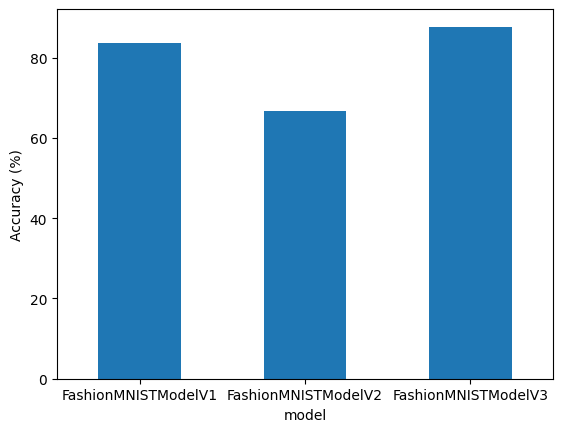

In [48]:
## Visualzing
models_results.set_index("model_name")["model_acc"].plot(kind="bar")
plt.ylabel("Accuracy (%)")
plt.xlabel("model")
plt.xticks(rotation=0)
plt.show()

### 7. Predictions with best model

In [49]:
def make_preds(model: torch.nn.Module,
               data: list,
               device: torch.device = device):

  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      ## Forward pass
      pred_logits = model(sample)

      ## Pred Prob
      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

      ## Appending pred_prob ro pred_probs
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [50]:
import random
# torch.manual_seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# Viewing the shape of first sample
test_samples[0].shape



torch.Size([1, 28, 28])

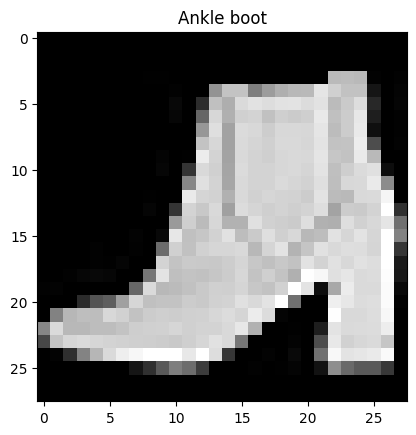

In [51]:
plt.imshow(test_samples[0].squeeze(), cmap="grey")
plt.title(class_names[test_labels[0]])
plt.show()

In [52]:
## Making predictions
pred_probs = make_preds(model=model_3,
                        data=test_samples)

## Viewing the first two pred probs
pred_probs[:4]

tensor([[2.2593e-08, 3.8312e-10, 1.1976e-07, 8.2812e-08, 4.7703e-08, 1.3766e-04,
         1.8528e-06, 8.1729e-07, 1.0858e-04, 9.9975e-01],
        [1.7243e-04, 7.6110e-06, 6.5591e-02, 1.0983e-06, 8.2820e-01, 1.6541e-07,
         1.0592e-01, 3.8808e-07, 1.0009e-04, 6.9681e-06],
        [2.3192e-05, 2.1376e-07, 3.5309e-05, 2.7273e-05, 3.6584e-07, 9.7510e-04,
         1.7389e-05, 8.5637e-01, 1.4129e-04, 1.4241e-01],
        [7.0584e-04, 1.4015e-05, 1.0442e-02, 7.4838e-04, 2.9626e-01, 4.4020e-06,
         6.9177e-01, 5.3653e-06, 4.0688e-05, 1.1403e-05]])

In [53]:
## Converting pred prob to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 4, 7, 6, 8, 6, 7, 0, 3])

In [54]:
test_labels

[9, 4, 7, 6, 8, 2, 7, 0, 0]

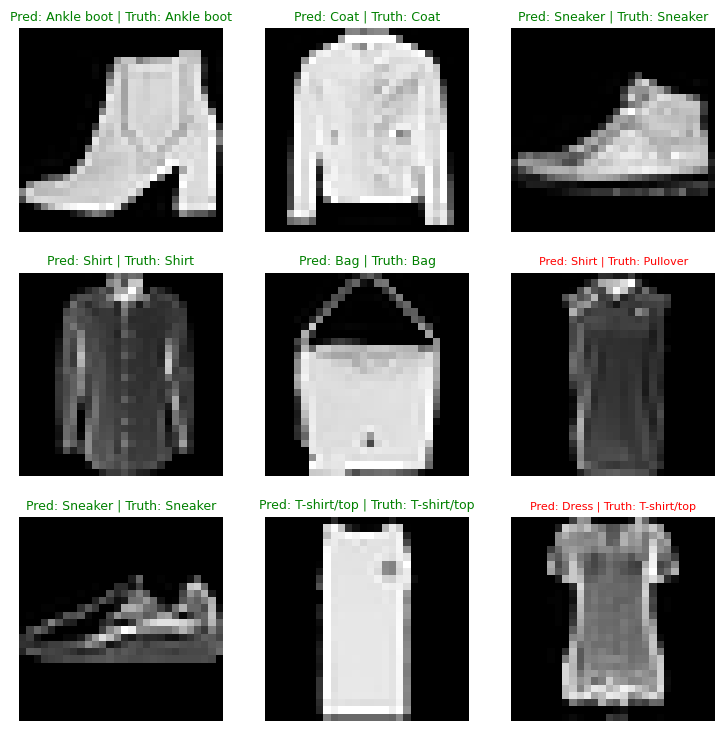

In [55]:
## Plotting the predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):

  plt.subplot(nrows, ncols, i+1)

  # Plotting the target image
  plt.imshow(sample.squeeze(), cmap="grey")

  # Finding the prediction label
  pred_label = class_names[pred_classes[i]]

  # Truth label
  truth_label = class_names[test_labels[i]]

  # Title for plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Checking equalituy bw pred and truth
  if pred_label == truth_label:
    plt.title(title_text, fontsize=9, c="g")
  else:
    plt.title(title_text, fontsize=8, c="r")

  plt.axis(False)

### 8. Confusion matrix for model predictions
* Confusion matrix compares the values of predictions with true values in a tabular format.
* If all the values are correct, then the values will be from top left to bottom right in a matrix diagonal line.

In [56]:
## Making predictions with the trained model
from tqdm.auto import tqdm

y_preds = []
model_3.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc = "Making Predictions"):
    X, y = X.to(device), y.to(device)

    ## Forward Pass
    y_logits = model_3(X)

    ## Turning logits to pred probs then pred labels
    y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)

    ## Putting preds on cpu (as matplotlib wants them in cpu)
    y_preds.append(y_pred.cpu())

## Concatanate list of preds into a tensor
# print(y_preds)
y_pred_tensor = torch.concatenate(y_preds)

y_pred_tensor, len(y_pred_tensor)

Making Predictions:   0%|          | 0/228 [00:00<?, ?it/s]

(tensor([9, 2, 1,  ..., 8, 1, 7]), 10000)

In [57]:
%pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 16.2 MB/s eta 0:00:00


In [58]:
import mlxtend
mlxtend.__version__

'0.23.4'

In [59]:
import torchmetrics
torchmetrics.__version__

'1.8.2'

In [70]:
print(f"Prediction Values: \n{y_pred_tensor}\n")
print(f"Original Test Classes: \n{test_data.classes}\n")
print(f"Original Test Targets: \n{test_data.targets}")

Prediction Values: 
tensor([9, 2, 1,  ..., 8, 1, 7])

Original Test Classes: 
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Original Test Targets: 
tensor([9, 2, 1,  ..., 8, 1, 5])


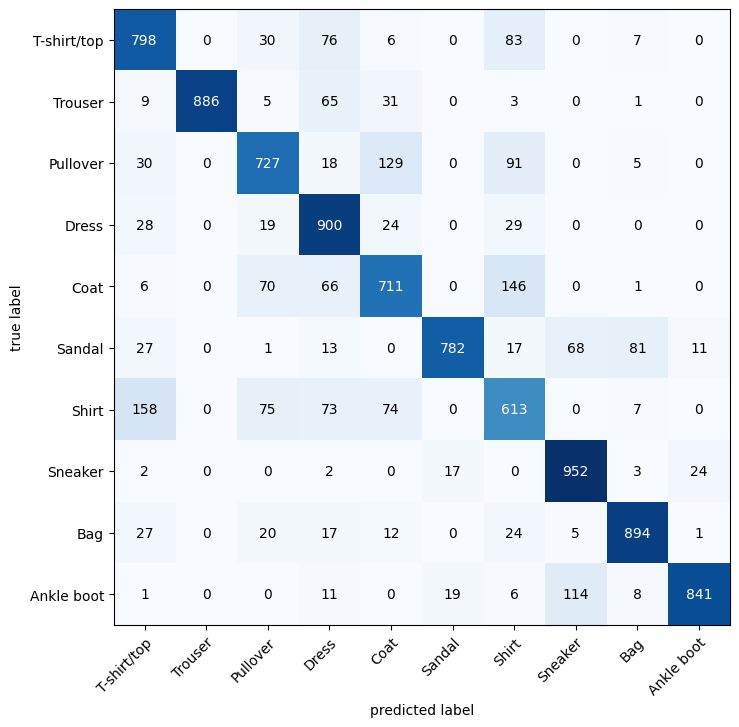

In [73]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

## Setting up conf matrix to compare pred values with true values
conf_mat = ConfusionMatrix(task="multiclass",
                           num_classes=len(class_names))
conf_mat_tensor = conf_mat(preds=y_pred_tensor,
                           target=test_data.targets)

## Plotting conf matrix using mlxtend
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_tensor.numpy(), # For matplotlib, it works better with numpy
                                class_names=class_names,
                                figsize=(10,8))

### 9. Saving the model

In [76]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

## model name and path
MODEL_NAME="04_pytorch_cnn_model_3.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Savind the Model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_3.state_dict(), f=MODEL_SAVE_PATH)

Savind the Model to: models/04_pytorch_cnn_model_3.pth


### 10. Loading the saved model

In [78]:
torch.manual_seed(42)

loaded_model_3 = FashionMNISTModelV3(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

## Loading the state dict
loaded_model_3.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_3

FashionMNISTModelV3(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### Evaluation using the loaded model
* Performing eval_model step to make sure that loaded model gives the same value as the saved model

In [80]:
torch.manual_seed(42)

loaded_model_3_results = eval_model(model=loaded_model_3,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device)

loaded_model_3_results

{'model_name': 'FashionMNISTModelV3',
 'model_loss': 0.3393721580505371,
 'model_acc': 87.69936204146737}

In [81]:
model_3_results == loaded_model_3_results

True